Análise de séries temporais

In [815]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [816]:
df = pd.read_csv('../dataset/case_28_series_train.csv')

In [817]:
df_test = pd.read_csv('../dataset/case_28_series_test.csv')

In [818]:
df_test.size

3348

In [819]:
# df = df[:10000]

In [820]:
df.head()

,Time,EEG,BIS
0,00:00:00.000,NaN,NaN
1,00:00:01.000,NaN,NaN
2,00:00:02.000,NaN,NaN
3,00:00:03.000,NaN,NaN
4,00:00:04.000,NaN,NaN


In [821]:
df = df.drop(columns=['BIS'])

In [822]:
df.dtypes

Time     object
EEG     float64
dtype: object

In [823]:
df.Time.dropna()

0       00:00:00.000
1       00:00:01.000
2       00:00:02.000
3       00:00:03.000
4       00:00:04.000
            ...     
3341    00:55:41.000
3342    00:55:42.000
3343    00:55:43.000
3344    00:55:44.000
3345    00:55:45.000
Name: Time, Length: 3346, dtype: object

In [824]:
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
df = df.set_index(['Time'])

In [825]:
df.dtypes

EEG    float64
dtype: object

Importar seasonal_decompose para decompor nossa série temporal em tendência, sazonalidade e ruído

In [826]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [827]:
df

,EEG
Time,
2022-04-17 00:00:00,NaN
2022-04-17 00:00:01,NaN
2022-04-17 00:00:02,NaN
2022-04-17 00:00:03,NaN
2022-04-17 00:00:04,NaN
...,...
2022-04-17 00:55:41,-3.00671
2022-04-17 00:55:42,0.01526
2022-04-17 00:55:43,-1.99939


In [828]:
# df.index = df.Time

In [829]:
y = df['EEG'].dropna() 
y.head()

Time
2022-04-17 00:02:57    12.01160
2022-04-17 00:02:58     0.99206
2022-04-17 00:02:59     0.01526
2022-04-17 00:03:00     0.01526
2022-04-17 00:03:01    -1.99939
Name: EEG, dtype: float64

In [830]:
df.isna().sum().sum()

177

In [831]:
df = df.dropna()

In [832]:
resultados = seasonal_decompose(df.EEG.dropna(), freq = 1000)

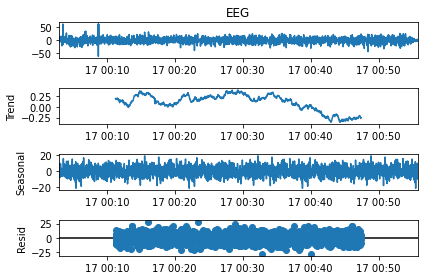

In [833]:
resultados.plot();

In [834]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.legend(fontsize=18)

In [835]:
# plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red', 'blue', 'green', 'observed', 'trend', 'seasonal')

In [836]:
def plotar_serie(y, cor, label):
    plt.figure(figsize=(20,7))
    plt.plot(y, color=cor, label=label)
    plt.legend(fontsize=18)

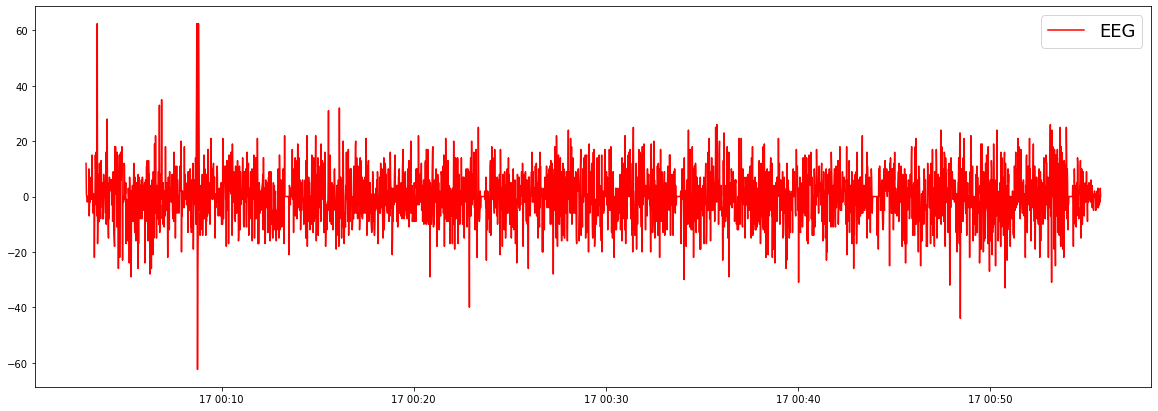

In [837]:
plotar_serie(resultados.observed, 'red', 'EEG')

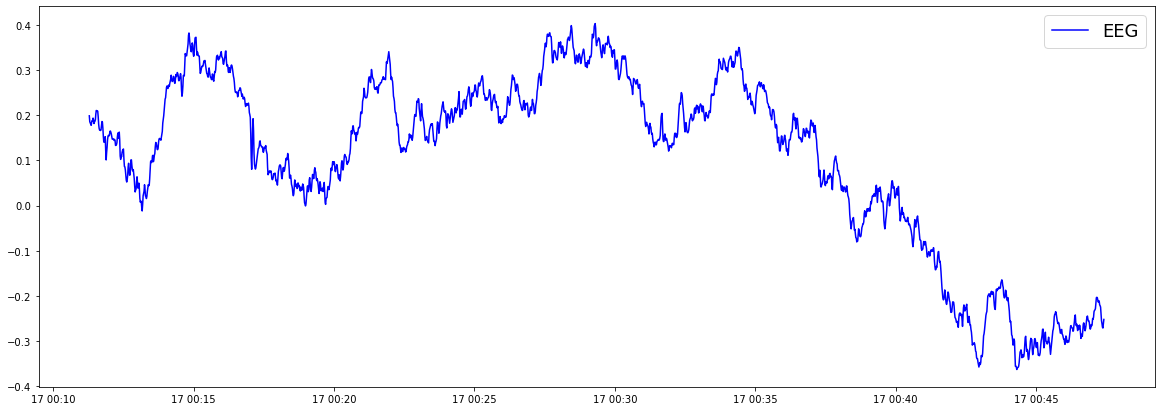

In [838]:
plotar_serie(resultados.trend, 'blue', 'EEG')

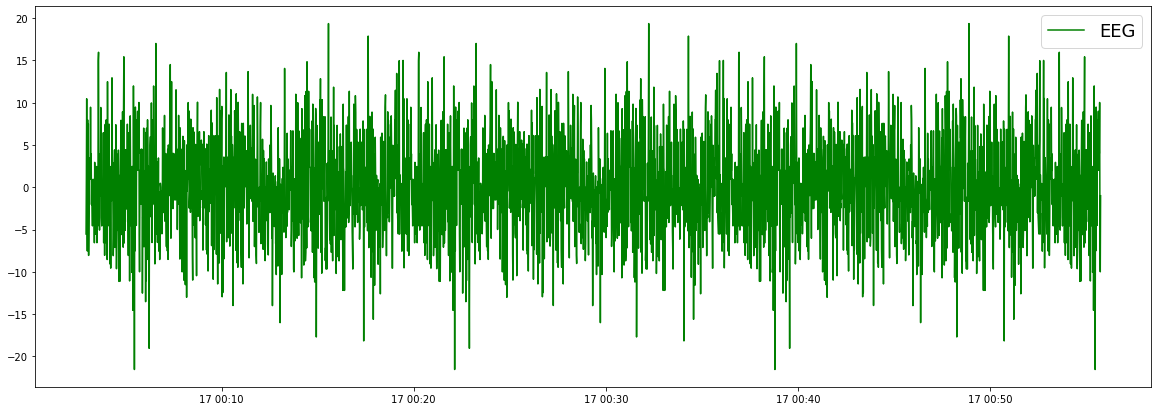

In [839]:
plotar_serie(resultados.seasonal, 'green', 'EEG')

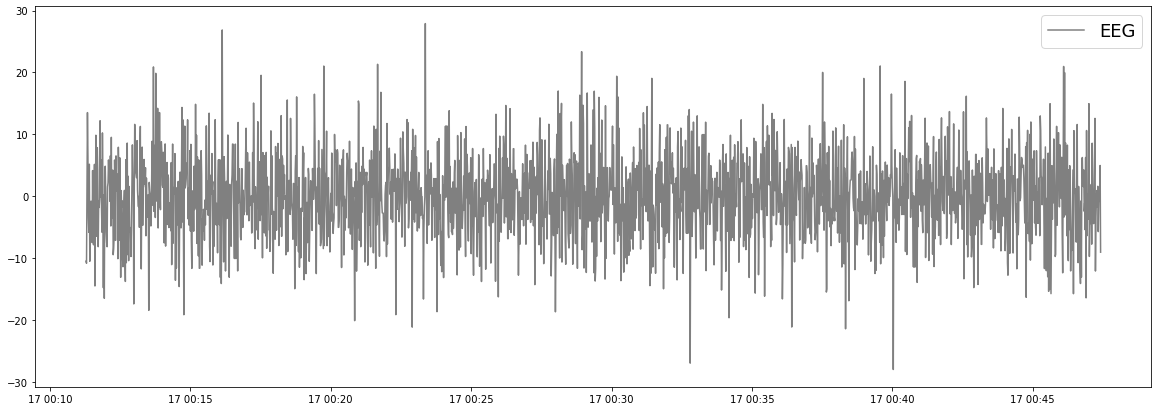

In [840]:
plotar_serie(resultados.resid, 'gray', 'EEG')

Média móvel dos últimos 5 minutos

<AxesSubplot:xlabel='Time'>

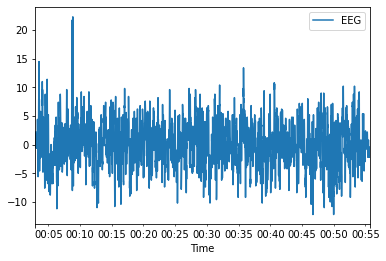

In [841]:
df.rolling(5).mean().plot()

<AxesSubplot:ylabel='Frequency'>

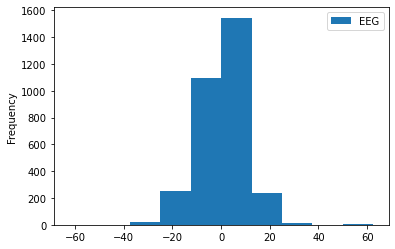

In [842]:
df.plot.hist()

Fazendo o teste para verificar se a série é estacionária

In [843]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [844]:
from statsmodels.tsa.stattools import adfuller

In [845]:
adfuller(y.dropna())

(-31.237273803199997,
 0.0,
 3,
 3165,
 {'1%': -3.432417807760863,
  '5%': -2.862453630885886,
  '10%': -2.5672563467676928},
 22970.178969490546)

In [846]:
dfd1 = df.diff().dropna()

In [847]:
test, pvalue, lags, obs, critic, ic = tsa.stattools.adfuller(dfd1, regression='ct')
print(pvalue)
print(lags)

0.0
29


In [848]:
resultados = seasonal_decompose(df.EEG.dropna(), freq = 1000)

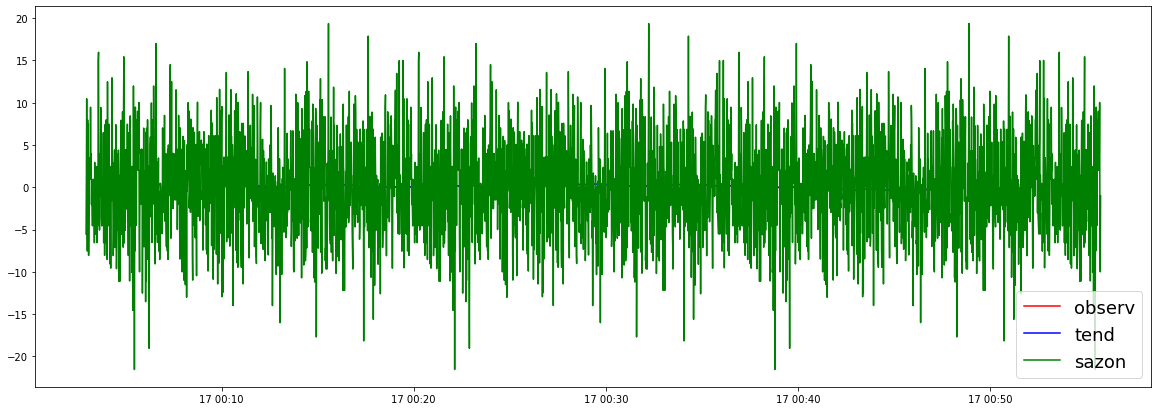

In [849]:
plotar(resultados.trend, resultados.trend, resultados.seasonal, 'red', 'blue', 'green', 'observ', 'tend', 'sazon')

In [850]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [851]:
def plotar_acf(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1, title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2, title='1a diff')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3, title='2a diff')

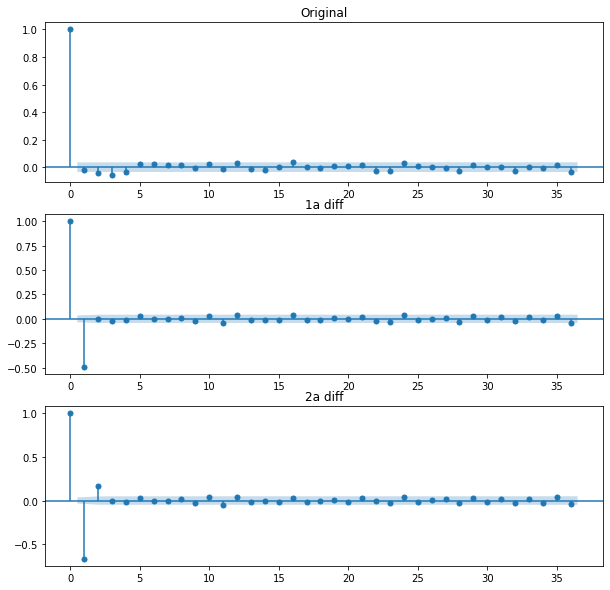

In [852]:
plotar_acf(y, y.diff().dropna(), y.diff().diff().dropna())

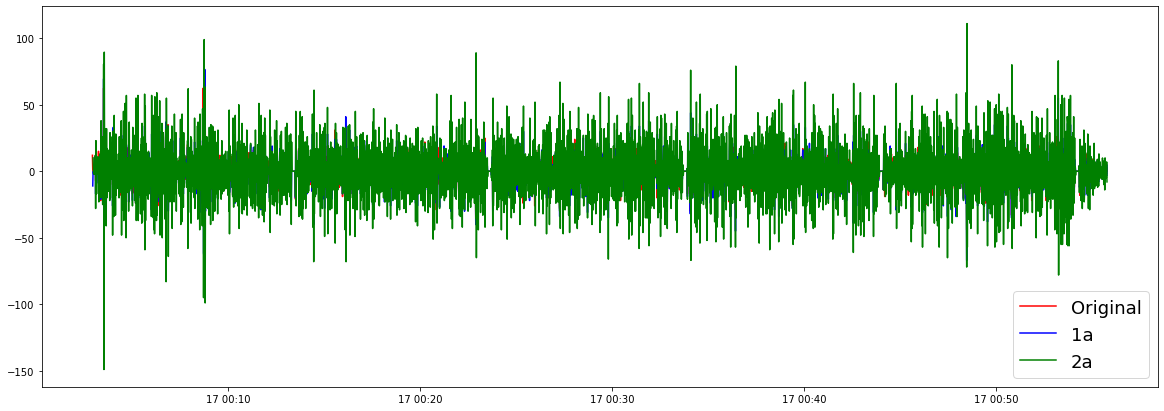

In [853]:
plotar(y, y.diff(), y.diff().diff(), 'red', 'blue', 'green', 'Original', '1a', '2a')

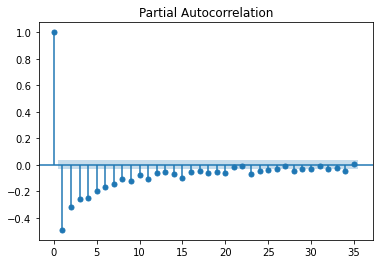

In [854]:
plot_pacf(y.diff().dropna(), lags=35);

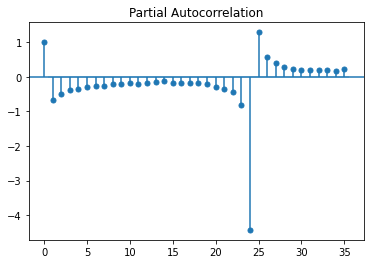

In [855]:
plot_pacf(y.diff().diff().dropna(), lags=35);

Faixa azul é o nível de significância.
Manipular muito os dados pode prejudicar o modelo no futuro

<AxesSubplot:xlabel='Time'>

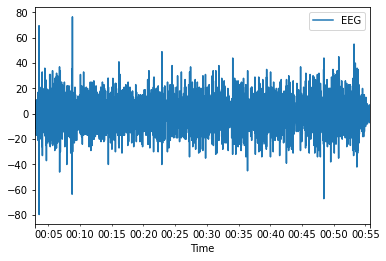

In [856]:
df.diff().plot()

In [857]:
df.shift(1)

,EEG
Time,
2022-04-17 00:02:57,NaN
2022-04-17 00:02:58,12.01160
2022-04-17 00:02:59,0.99206
2022-04-17 00:03:00,0.01526
2022-04-17 00:03:01,0.01526
...,...
2022-04-17 00:55:41,0.01526
2022-04-17 00:55:42,-3.00671
2022-04-17 00:55:43,0.01526


In [858]:
df.corrwith(df.shift(1))

EEG   -0.021962
dtype: float64

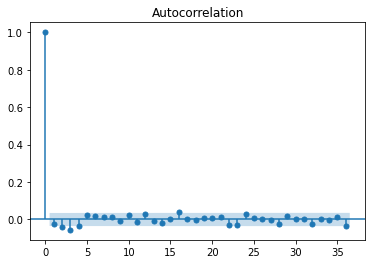

In [859]:
plot_acf(df);

In [860]:
dfd1.corrwith(dfd1.shift(1))

EEG   -0.490944
dtype: float64

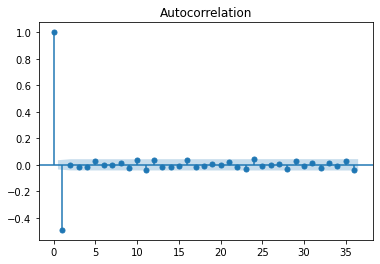

In [861]:
plot_acf(dfd1);

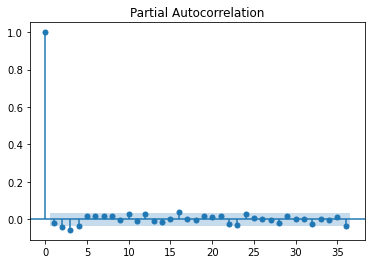

In [862]:
plot_pacf(df);

ARIMA

In [863]:
df_test

,Time,EEG,BIS
0,00:55:46.000,-3.00671,80.0
1,00:55:47.000,4.01404,79.0
2,00:55:48.000,0.99206,78.0
3,00:55:49.000,0.01526,78.0
4,00:55:50.000,0.01526,78.0
...,...,...,...
1111,01:14:17.000,NaN,NaN
1112,01:14:18.000,NaN,NaN
1113,01:14:19.000,NaN,NaN
1114,01:14:20.000,NaN,NaN


In [864]:
df_test = df_test.drop(columns=['BIS'])
df_test

,Time,EEG
0,00:55:46.000,-3.00671
1,00:55:47.000,4.01404
2,00:55:48.000,0.99206
3,00:55:49.000,0.01526
4,00:55:50.000,0.01526
...,...,...
1111,01:14:17.000,NaN
1112,01:14:18.000,NaN
1113,01:14:19.000,NaN
1114,01:14:20.000,NaN


In [865]:
df_model =  ARIMA(dfd1, order=(3,0,0))

In [866]:
res = df_model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    EEG   No. Observations:                 3168
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -12005.603
Date:                Sun, 17 Apr 2022   AIC                          24021.205
Time:                        18:01:33   BIC                          24051.509
Sample:                    04-17-2022   HQIC                         24032.075
                         - 04-17-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.077     -0.015      0.988      -0.153       0.150
ar.L1         -0.7303      0.013    -58.187      0.000      -0.755      -0.706
ar.L2         -0.4868      0.016    -31.353      0.000      -0.517      -0.456
ar.L3         -0.2582      0.013    -19.467      0.000      -0.284      -0.232
sigma2       114.5941      1.904     60.179      0.000     110.862     118.326
===================================================================================
Ljung-Box (L1) (Q):                  13.02   Jarque-Bera (JB):              1660.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.03
Prob(H) (two-sided):                  0.10   Kurtosis:                         6.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

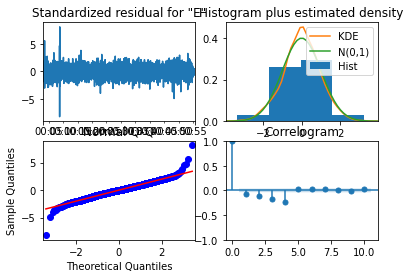

In [867]:
res.plot_diagnostics();

In [868]:
df_test = df_test.dropna()

In [869]:
df_test.size

1888

In [870]:
df_train = df.iloc[:int(len(df))]
# df_test = df_test.iloc[int(len(df_test)):]

In [871]:
df_train.size

3169

In [872]:
df_test.size

1888

In [873]:
df_test.dtypes

Time     object
EEG     float64
dtype: object

In [874]:
df_test['Time'] = pd.to_datetime(df_test['Time'])

In [875]:
res

In [876]:
y_test = df_test['EEG'].dropna() 
y_test.head()

0   -3.00671
1    4.01404
2    0.99206
3    0.01526
4    0.01526
Name: EEG, dtype: float64

In [877]:
df_test.dtypes

Time    datetime64[ns]
EEG            float64
dtype: object

In [878]:
y_test.dtypes

dtype('float64')

In [879]:
res2 = res.apply(y_test)

In [880]:
res2.predict()

0      -0.001158
1       1.474396
2      -1.641883
3      -1.905111
4      -1.533592
         ...    
939     0.903501
940    -3.264815
941    33.110531
942    67.744790
943    31.602923
Name: predicted_mean, Length: 944, dtype: float64

In [881]:
pd.concat([res2.predict(),y_test],axis=1)

,predicted_mean,EEG
0,-0.001158,-3.00671
1,1.474396,4.01404
2,-1.641883,0.99206
3,-1.905111,0.01526
4,-1.533592,0.01526
...,...,...
939,0.903501,3.00671
940,-3.264815,-46.99329
941,33.110531,-62.50000
942,67.744790,15.00305


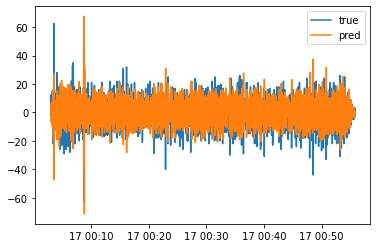

In [882]:
fig, ax = plt.subplots()
ax.plot(df_train, label='true')
ax.plot(res.predict(), label='pred')
plt.legend()

In [884]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [885]:
print('CO2 - AR model Results')
print('r2' ,r2_score(res2.predict(), y_test))
print('mse' ,mean_squared_error(res2.predict(), y_test))
print('mae', mean_absolute_error(res2.predict(), y_test))

CO2 - AR model Results
r2 -1.2253579640655703
mse 56.214064549988606
mae 4.560187946962905


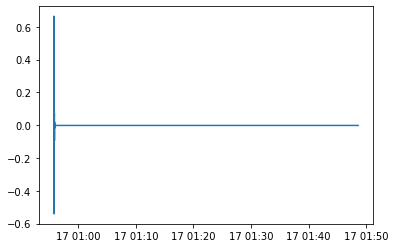

In [886]:
fig, ax = plt.subplots()
ax.plot(pd.concat([res.forecast(int(len(df))), y_test],axis=1))

# ARIMA

Junção dos modelos (AR e MA) estatísticos com uma diferenciação.
(Dados e ruídos)

ARIMA (p, d = 1, q = 1)

Para encontrar os parâmetros do ARIMA, precisamos analisar as autocorrelações e autocorrelações parciais

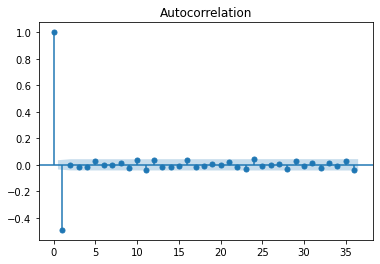

In [888]:
plot_acf(y.diff().dropna());

Mesmo com a 1a diff, vários lags estão acima do nível de significância devido a sazonalidade 

In [909]:
from statsmodels.tsa.arima_model import ARIMA

In [910]:
modelo = ARIMA(y, order=(1,1,1))

In [891]:
modelo_fit = modelo.fit(disp=0)
print(modelo_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.EEG   No. Observations:                 3168
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11592.948
Method:                       css-mle   S.D. of innovations              9.386
Date:                Sun, 17 Apr 2022   AIC                          23193.895
Time:                        18:03:38   BIC                          23218.139
Sample:                    04-17-2022   HQIC                         23202.591
                         - 04-17-2022                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0002      0.000     -1.113      0.266      -0.001       0.000
ar.L1.D.EEG    -0.0220      0.018     -1.239      0.215      -0.057       0.013
ma.L1.D.EEG    -1.0000      0.001  -1164.765    

SARIMA - ARIMA sazonal (P, D, Q)

Usado quando se tem muita sazonalidade

Identificando os parâmetros de forma automática

In [892]:
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [893]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

In [894]:
print('Exemplo de combinação de parâmetros para o ARIMA sazonal')
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0], seasonal_pdq[2]))

Exemplo de combinação de parâmetros para o ARIMA sazonal
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)


In [895]:
import statsmodels.api as sm

aic_lista = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))


In [896]:
aic_lista

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC23189.127508397996',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC23190.333196563555',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC25286.125473476444',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC23178.861093154563',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC23190.363544926677',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC23188.135972595388',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC24451.531450797338',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC23180.205079231044',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC23189.471839903832',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC23190.58113636719',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC25282.29088990605',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC23179.134522436027',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC23190.615588723158',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC23188.501829694178',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC24451.192589228558',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC23180.39535329038',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC25446.46054346671',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC25448.43962725480

In [897]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,7))
results = mod.fit()

In [898]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                               EEG   No. Observations:                 3169
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -11591.485
Date:                           Sun, 17 Apr 2022   AIC                          23192.970
Time:                                   18:04:57   BIC                          23223.263
Sample:                               04-17-2022   HQIC                         23203.837
                                    - 04-17-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0232      0.015     -1.593      0.111      -0.052       0.005
ma.L1         -0.9994      0.006   -177.937      0.000      -1.010      -0.988
ar.S.L7        0.0153      0.017      0.906      0.365      -0.018       0.048
ma.S.L7       -0.9997      0.050    -19.987      0.000      -1.098      -0.902
sigma2        88.0479      4.519     19.485      0.000      79.192      96.904
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               887.70
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.01
Prob(H) (two-sided):                  0.24   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

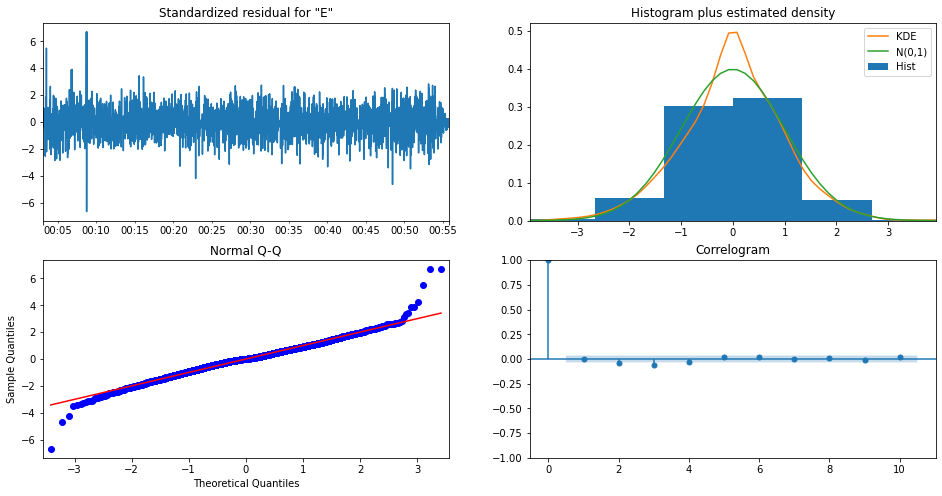

In [899]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [900]:
df.tail()

,EEG
Time,
2022-04-17 00:55:41,-3.00671
2022-04-17 00:55:42,0.01526
2022-04-17 00:55:43,-1.99939
2022-04-17 00:55:44,3.00671
2022-04-17 00:55:45,0.01526


In [901]:
df.index

DatetimeIndex(['2022-04-17 00:02:57', '2022-04-17 00:02:58',
               '2022-04-17 00:02:59', '2022-04-17 00:03:00',
               '2022-04-17 00:03:01', '2022-04-17 00:03:02',
               '2022-04-17 00:03:03', '2022-04-17 00:03:04',
               '2022-04-17 00:03:05', '2022-04-17 00:03:06',
               ...
               '2022-04-17 00:55:36', '2022-04-17 00:55:37',
               '2022-04-17 00:55:38', '2022-04-17 00:55:39',
               '2022-04-17 00:55:40', '2022-04-17 00:55:41',
               '2022-04-17 00:55:42', '2022-04-17 00:55:43',
               '2022-04-17 00:55:44', '2022-04-17 00:55:45'],
              dtype='datetime64[ns]', name='Time', length=3169, freq=None)

In [902]:
pred = results.get_prediction(start=pd.to_datetime('2022-04-17 00:02:57'), dynamic=False)
pred_ic = pred.conf_int()
pred_ic

,lower EEG,upper EEG
2022-04-17 00:02:57,-2772.053492,2772.053492
2022-04-17 00:02:58,-1948.301118,1972.322138
2022-04-17 00:02:59,-1959.317528,1961.305697
2022-04-17 00:03:00,-1960.296221,1960.327003
2022-04-17 00:03:01,-1960.296355,1960.326869
...,...,...
2022-04-17 00:55:41,-18.603335,18.222879
2022-04-17 00:55:42,-18.715851,18.110349
2022-04-17 00:55:43,-18.452164,18.374020
2022-04-17 00:55:44,-17.618934,19.207234


predicted_mean dá a média móvel dessa previsão

iloc[:,0] pega apenas o que está na primeira coluna
iloc[:,1] pega apenas o que está na segunda coluna

In [903]:
pred.predicted_mean

2022-04-17 00:02:57     0.000000
2022-04-17 00:02:58    12.010510
2022-04-17 00:02:59     0.994084
2022-04-17 00:03:00     0.015391
2022-04-17 00:03:01     0.015257
                         ...    
2022-04-17 00:55:41    -0.190228
2022-04-17 00:55:42    -0.302751
2022-04-17 00:55:43    -0.039072
2022-04-17 00:55:44     0.794150
2022-04-17 00:55:45    -0.478170
Freq: S, Name: predicted_mean, Length: 3169, dtype: float64

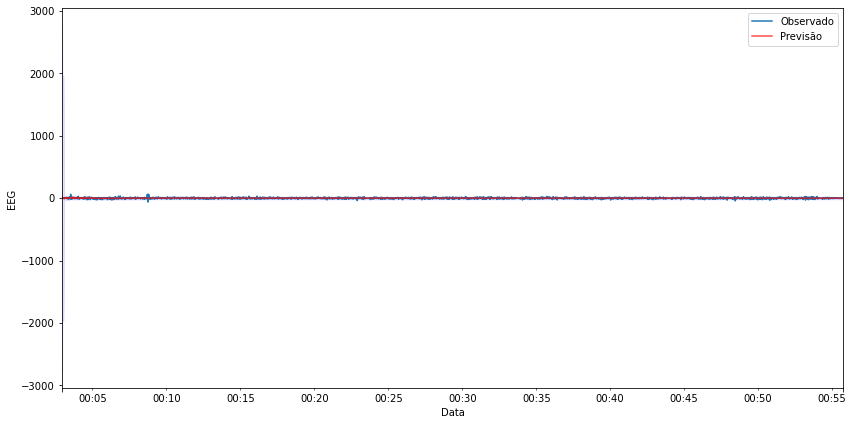

In [904]:
ax = y['2022-04-17 00:02:57':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color = 'r', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='b', alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('EEG')
plt.legend()
plt.show()

In [905]:
y

Time
2022-04-17 00:02:57    12.01160
2022-04-17 00:02:58     0.99206
2022-04-17 00:02:59     0.01526
2022-04-17 00:03:00     0.01526
2022-04-17 00:03:01    -1.99939
                         ...   
2022-04-17 00:55:41    -3.00671
2022-04-17 00:55:42     0.01526
2022-04-17 00:55:43    -1.99939
2022-04-17 00:55:44     3.00671
2022-04-17 00:55:45     0.01526
Name: EEG, Length: 3169, dtype: float64

In [906]:
pred

In [907]:
y['2022-04-17 00:55:46':]

Series([], Name: EEG, dtype: float64)

Steps é o número de dias que quero prever

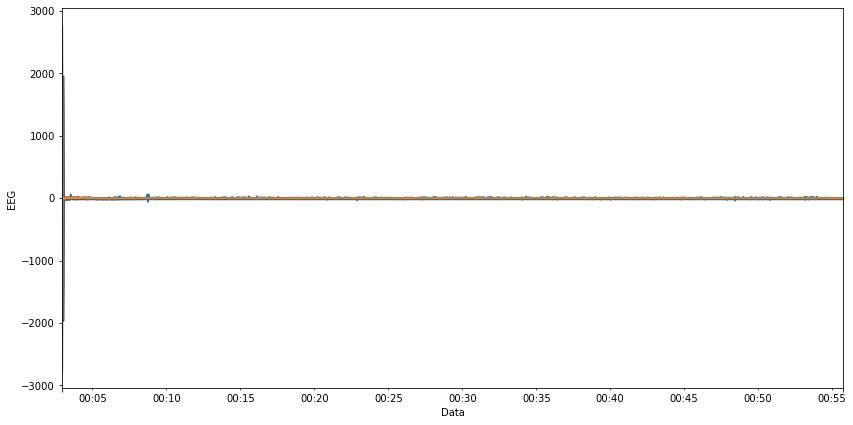

In [908]:
pred_uc = results.get_prediction(steps=10000)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.5)
ax.set_xlabel('Data')
ax.set_ylabel('EEG')
plt.show()

In [911]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [912]:
results = {}

In [915]:
df = df[1:]

In [919]:
df_train = df_train[1:]

In [920]:
print('MA model Results')
print('r2' , r2_score(modelo_fit.predict(), df_train))
print('mse' ,mean_squared_error(modelo_fit.predict(), df_train))
print('mae', mean_absolute_error(modelo_fit.predict(), df_train))
modelo_fit['MA'] = {'r2':r2_score(modelo_fit.predict(), df_train), \
                 'mse': mean_squared_error(modelo_fit.predict(), df_train), 
                 'mae': mean_absolute_error(modelo_fit.predict(), df_train)}

MA model Results
r2 -0.9167725173134171
mse 176.05149635810736
mae 10.00700046711308


TypeError: 'ARIMAResultsWrapper' object does not support item assignment